In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import tensorflow as tf

In [2]:
# Read CSV files from Resources folder into DataFrames
white_wine_df = pd.read_csv(Path("Resources/winequality-white.csv"))
white_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
# Add "rating" column
def map_rating(quality):
    if quality <= 4:
        return "bad"
    elif quality <=6:
        return "average"
    else:
        return "good"

white_wine_df['rating'] = white_wine_df['quality'].apply(map_rating)

white_wine_df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,average
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,average
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,average
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,average
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,average
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,average
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,average
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,average
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,average
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,average


In [4]:
red_wine_df = pd.read_csv(Path("Resources/winequality-red.csv"))
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## White Wine Model 

In [5]:
# Determine the number of unique values in each column.
white_wine_df.nunique()

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
rating                    3
dtype: int64

In [6]:
# Split our preprocessed data into our features and target arrays
y = white_wine_df["rating"].values
X = white_wine_df.drop(["quality", "rating"], axis='columns').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=48)

In [7]:
np.unique(y_train)

array(['average', 'bad', 'good'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform target values
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

In [9]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Compile, Train, Evaluate Model

In [21]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input = len(X_train[0])
hidden_layer_1 = 50
hidden_layer_2 = 50
hidden_layer_3 = 25

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_layer_1, input_dim=num_input, activation="relu")
)

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_layer_2, activation="relu")
)

# Third hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_layer_3, activation="relu")
)

# Output layer
nn.add(
    tf.keras.layers.Dense(units=7, activation="sigmoid")
)

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                600       
                                                                 
 dense_5 (Dense)             (None, 50)                2550      
                                                                 
 dense_6 (Dense)             (None, 25)                1275      
                                                                 
 dense_7 (Dense)             (None, 7)                 182       
                                                                 
Total params: 4607 (18.00 KB)
Trainable params: 4607 (18.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# Compile the model
nn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train_encoded, epochs=150)

Epoch 1/150
115/115 [==============================] - 1s 3ms/step - loss: 0.8734 - accuracy: 0.7130
Epoch 2/150
115/115 [==============================] - 0s 3ms/step - loss: 0.5834 - accuracy: 0.7667
Epoch 3/150
115/115 [==============================] - 0s 3ms/step - loss: 0.5435 - accuracy: 0.7697
Epoch 4/150
115/115 [==============================] - 0s 3ms/step - loss: 0.5203 - accuracy: 0.7860
Epoch 5/150
115/115 [==============================] - 0s 3ms/step - loss: 0.5051 - accuracy: 0.7868
Epoch 6/150
115/115 [==============================] - 0s 3ms/step - loss: 0.4945 - accuracy: 0.7920
Epoch 7/150
115/115 [==============================] - 0s 3ms/step - loss: 0.4846 - accuracy: 0.7934
Epoch 8/150
115/115 [==============================] - 0s 3ms/step - loss: 0.4768 - accuracy: 0.7947
Epoch 9/150
115/115 [==============================] - 0s 3ms/step - loss: 0.4723 - accuracy: 0.7974
Epoch 10/150
115/115 [==============================] - 0s 3ms/step - loss: 0.4646 - accura

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test_encoded,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

39/39 - 0s - loss: 1.1596 - accuracy: 0.7935 - 310ms/epoch - 8ms/step
Loss: 1.1595886945724487, Accuracy: 0.7934693694114685


In [25]:
# Import the KNeighborsClassifier module from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNeighborsClassifier model with n_neighbors = 3 
knn = KNeighborsClassifier(n_neighbors=3)

In [26]:
# Train the model using the training data
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
# Create predictions using the testing data
y_pred = knn.predict(X_test_scaled)

In [28]:
# Print the classification report comparing the testing data to the model predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     average       0.84      0.89      0.86       917
         bad       0.38      0.15      0.21        41
        good       0.61      0.54      0.58       267

    accuracy                           0.79      1225
   macro avg       0.61      0.53      0.55      1225
weighted avg       0.77      0.79      0.78      1225



In [29]:
df = pd.DataFrame()
df['Actual'] = y_test
df['pred'] = y_pred
df.head()

,Actual,pred
0,average,average
1,average,average
2,average,average
3,good,average
4,good,good


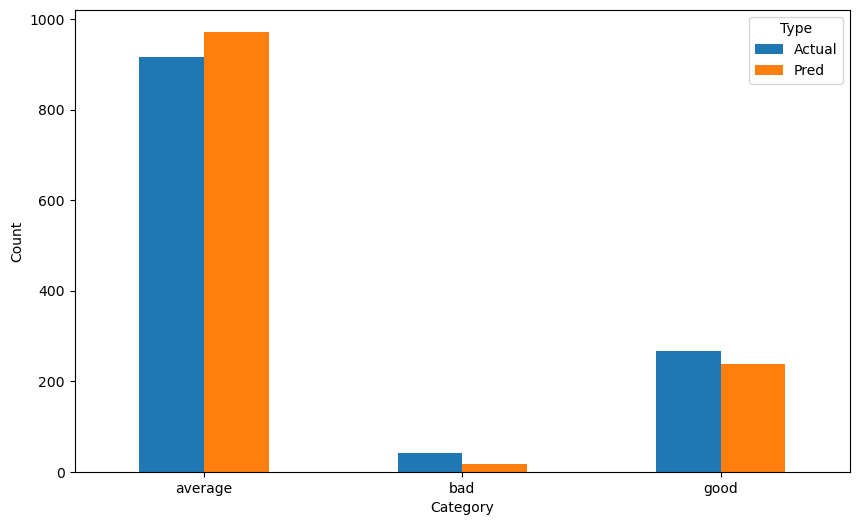

In [30]:
import matplotlib.pyplot as plt
# Calculate counts
actual_counts = df['Actual'].value_counts().sort_index()
pred_counts = df['pred'].value_counts().sort_index()

# Create a new DataFrame for plotting
plot_data = pd.DataFrame({'Actual': actual_counts, 'Pred': pred_counts})

# Plot
plot_data.plot(kind='bar', figsize=(10, 6))

# Customizing the plot
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep the category names horizontal for readability
plt.legend(title='Type')

# Show plot
plt.show()

In [31]:
df.to_csv(Path("Output/white_wine_predictions.csv"), index=False)
print("DataFrame has successfully exported.")

DataFrame has successfully exported.
